In [25]:
# Part 1 - Imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [15]:
# Part 2 - Load the datasets and combine them
# Load the datasets
opel_corsa_01 = pd.read_csv('opel_corsa_01.csv', sep=';', decimal=',')
opel_corsa_02 = pd.read_csv('opel_corsa_02.csv', sep=';', decimal=',')
peugeot_207_01 = pd.read_csv('peugeot_207_01.csv', sep=';', decimal=',')
peugeot_207_02 = pd.read_csv('peugeot_207_02.csv', sep=';', decimal=',')

# Combine the datasets into a single DataFrame
combined_df = pd.concat([opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02], ignore_index=True)


# Display the first few rows of the combined dataset and summary information
combined_df_info = combined_df.info()
combined_df_head = combined_df.head()

combined_df_info, combined_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23775 entries, 0 to 23774
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 23775 non-null  int64 
 1   AltitudeVariation          23775 non-null  object
 2   VehicleSpeedInstantaneous  23766 non-null  object
 3   VehicleSpeedAverage        23775 non-null  object
 4   VehicleSpeedVariance       23775 non-null  object
 5   VehicleSpeedVariation      23775 non-null  object
 6   LongitudinalAcceleration   23775 non-null  object
 7   EngineLoad                 23770 non-null  object
 8   EngineCoolantTemperature   23770 non-null  object
 9   ManifoldAbsolutePressure   23770 non-null  object
 10  EngineRPM                  23770 non-null  object
 11  MassAirFlow                23770 non-null  object
 12  IntakeAirTemperature       23770 non-null  object
 13  VerticalAcceleration       23775 non-null  object
 14  FuelCo

(None,
    Unnamed: 0    AltitudeVariation VehicleSpeedInstantaneous  \
 0          59           -2.2999878               25.67051888   
 1          60           -2.0999756               24.09425926   
 2          61                 -1.5               22.74317932   
 3          62            0.1000366               22.29281998   
 4          63  0.09997560000000001               23.64389992   
 
   VehicleSpeedAverage VehicleSpeedVariance VehicleSpeedVariation  \
 0         13.22350089   121.59268970000001   -2.4769802000000003   
 1         13.63891915          120.4225707           -1.57625962   
 2         14.03104293          118.4567689           -1.35107994   
 3         14.17107305          117.5713084           -0.45035934   
 4          14.3289535          117.0741485            1.35107994   
 
   LongitudinalAcceleration   EngineLoad EngineCoolantTemperature  \
 0                   0.3555  4.705882549                       68   
 1                   0.4492  10.58823586       

In [16]:
# Part 3 - Data Preprocessing and Cleaning
# Convert columns with numeric data represented as strings to appropriate numeric types
numeric_cols = ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 
                'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 
                'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 
                'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage']

# We'll recalculate the median for numeric columns only to avoid the error
numeric_medians = combined_df[numeric_cols].median()

# Now fill missing values with the median of their respective columns
combined_df[numeric_cols] = combined_df[numeric_cols].fillna(numeric_medians)

# Check the info again to ensure all numeric columns have no missing values
combined_df_info_after_filling = combined_df.info()
combined_df_head_after_filling = combined_df.head()

combined_df_info_after_filling, combined_df_head_after_filling




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23775 entries, 0 to 23774
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 23775 non-null  int64 
 1   AltitudeVariation          23775 non-null  object
 2   VehicleSpeedInstantaneous  23775 non-null  object
 3   VehicleSpeedAverage        23775 non-null  object
 4   VehicleSpeedVariance       23775 non-null  object
 5   VehicleSpeedVariation      23775 non-null  object
 6   LongitudinalAcceleration   23775 non-null  object
 7   EngineLoad                 23775 non-null  object
 8   EngineCoolantTemperature   23775 non-null  object
 9   ManifoldAbsolutePressure   23775 non-null  object
 10  EngineRPM                  23775 non-null  object
 11  MassAirFlow                23775 non-null  object
 12  IntakeAirTemperature       23775 non-null  object
 13  VerticalAcceleration       23775 non-null  object
 14  FuelCo

(None,
    Unnamed: 0    AltitudeVariation VehicleSpeedInstantaneous  \
 0          59           -2.2999878               25.67051888   
 1          60           -2.0999756               24.09425926   
 2          61                 -1.5               22.74317932   
 3          62            0.1000366               22.29281998   
 4          63  0.09997560000000001               23.64389992   
 
   VehicleSpeedAverage VehicleSpeedVariance VehicleSpeedVariation  \
 0         13.22350089   121.59268970000001   -2.4769802000000003   
 1         13.63891915          120.4225707           -1.57625962   
 2         14.03104293          118.4567689           -1.35107994   
 3         14.17107305          117.5713084           -0.45035934   
 4          14.3289535          117.0741485            1.35107994   
 
   LongitudinalAcceleration   EngineLoad EngineCoolantTemperature  \
 0                   0.3555  4.705882549                       68   
 1                   0.4492  10.58823586       

In [17]:
# Initialize a label encoder for the target column 'traffic'
label_encoder = LabelEncoder()

# Fit and transform the 'traffic' column to encode it numerically
combined_df['traffic_encoded'] = label_encoder.fit_transform(combined_df['traffic'])

# Let's check the mapping of encoded classes
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Drop the original 'traffic' column as we now have an encoded version
combined_df = combined_df.drop('traffic', axis=1)

# Display the mapping and the first few rows to confirm the change
class_mapping, combined_df.head()

({'HighCongestionCondition': 0,
  'LowCongestionCondition': 1,
  'NormalCongestionCondition': 2},
    Unnamed: 0    AltitudeVariation VehicleSpeedInstantaneous  \
 0          59           -2.2999878               25.67051888   
 1          60           -2.0999756               24.09425926   
 2          61                 -1.5               22.74317932   
 3          62            0.1000366               22.29281998   
 4          63  0.09997560000000001               23.64389992   
 
   VehicleSpeedAverage VehicleSpeedVariance VehicleSpeedVariation  \
 0         13.22350089   121.59268970000001   -2.4769802000000003   
 1         13.63891915          120.4225707           -1.57625962   
 2         14.03104293          118.4567689           -1.35107994   
 3         14.17107305          117.5713084           -0.45035934   
 4          14.3289535          117.0741485            1.35107994   
 
   LongitudinalAcceleration   EngineLoad EngineCoolantTemperature  \
 0                   0.35

VehicleSpeedAverage          0.131568
EngineCoolantTemperature     0.126380
FuelConsumptionAverage       0.103913
VehicleSpeedVariance         0.098571
IntakeAirTemperature         0.095976
EngineRPM                    0.079925
LongitudinalAcceleration     0.075065
ManifoldAbsolutePressure     0.060131
VehicleSpeedInstantaneous    0.053979
VerticalAcceleration         0.053428
MassAirFlow                  0.045692
EngineLoad                   0.031551
AltitudeVariation            0.027359
VehicleSpeedVariation        0.016463
dtype: float64


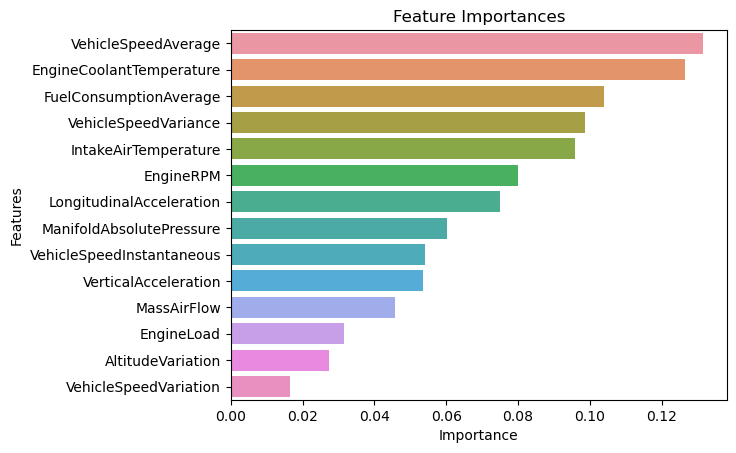

In [28]:
# Part 4 - Evaluate the relevance of each feature to the target variable

# Prepare the features (X) and the target variable (y)
X = combined_df.drop(columns=['traffic_encoded', 'Unnamed: 0', 'roadSurface', 'drivingStyle'])
y = combined_df['traffic_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Output the sorted feature importances
print(sorted_feature_importances)

# Visualisation of Feature Importances
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [34]:
# Part 5 - SMOTE Resampling to balance dataset
# Prepare the features (X) and target variable (y)
X = combined_df.drop(columns=['traffic_encoded', 'Unnamed: 0', 'roadSurface', 'drivingStyle'])
y = combined_df['traffic_encoded']

# Standardize the features before the train-test split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())



traffic_encoded
1    12434
2    12434
0    12434
Name: count, dtype: int64


In [35]:
# Part 6 - Training the Classification models

# Initialize the classifiers
svm_clf = LinearSVC(random_state=42, dual=False, max_iter=5000)
logreg_clf = LogisticRegression(random_state=42, max_iter=5000)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate the classifiers using cross-validation
for clf, name in zip([svm_clf, logreg_clf, knn_clf], ['Linear SVM', 'Logistic Regression', 'kNN']):
    scores = cross_val_score(clf, X_resampled, y_resampled, cv=5)
    print(f'{name} Accuracy: {scores.mean():.2f} ')
    
    # Fit the model on the resampled training data
    clf.fit(X_resampled, y_resampled)
    
    # Predict on the original test set, not resampled
    y_pred = clf.predict(X_test)
    
    # Print the classification report for the original test set
    print(pd.Series(y_pred).value_counts())

    print(f'\nClassification Report for {name}:\n', classification_report(y_test, y_pred))


Linear SVM Accuracy: 0.63 
1    3706
0    1934
2    1493
Name: count, dtype: int64

Classification Report for Linear SVM:
               precision    recall  f1-score   support

           0       0.37      0.80      0.51       906
           1       0.91      0.63      0.75      5330
           2       0.27      0.45      0.34       897

    accuracy                           0.63      7133
   macro avg       0.52      0.63      0.53      7133
weighted avg       0.76      0.63      0.67      7133

Logistic Regression Accuracy: 0.64 
1    3646
2    1755
0    1732
Name: count, dtype: int64

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.40      0.77      0.53       906
           1       0.92      0.63      0.75      5330
           2       0.26      0.51      0.34       897

    accuracy                           0.63      7133
   macro avg       0.53      0.63      0.54      7133
weighted avg       0.77      

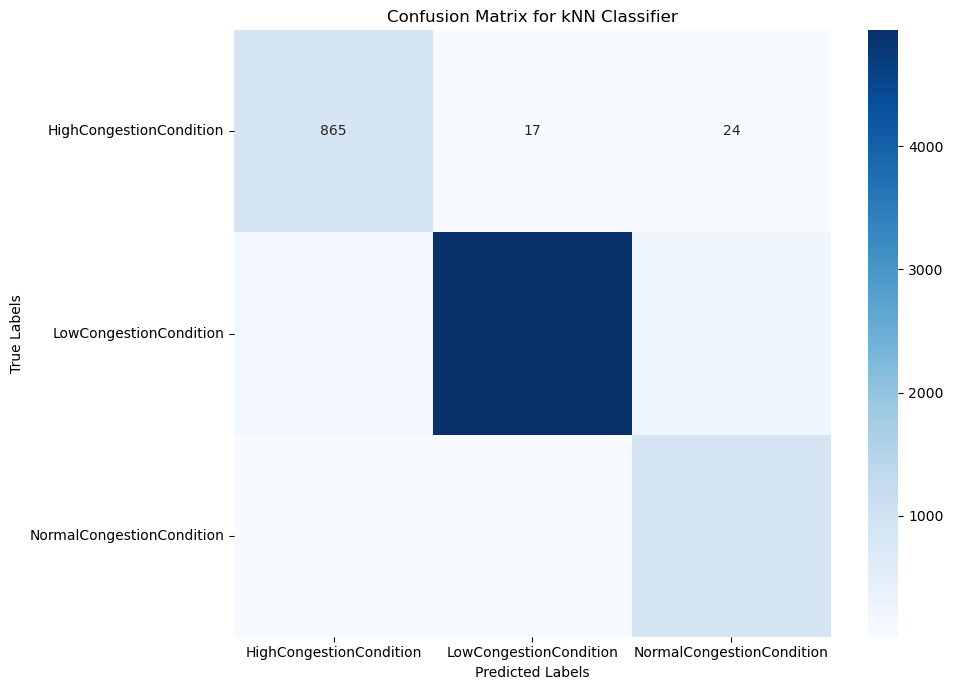

In [31]:
# Part 7 - Visualisation - Heatmap of Confusion Matrix for kNN Classifier

cm = confusion_matrix(y_test, y_pred)

# Define the size of the figure
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for kNN Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()